<a href="https://colab.research.google.com/github/tathi-martins/Alura-Bootcamp-Ciencia-de-Dados-Aplicada-2/blob/add-license-1/Super_Desafio_Modulo_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O objetivo principal é verificar a evolução das campanhas de vacinação. As coberturas vacinais estão aumentando ou diminuindo? A adesão à vacinação tem melhorado ou piorado ao longo dos anos? E se possível descobrir a razão disso, se houve um aumento ou diminuição em investimentos em vacinação como, campanhas de conscientização, aumentar a cobertura do público alvo para determinadas vacinas, ou seja, se houve um aumento de gastos investidos na vacinação da população pelo Ministério da Saúde.

**Cobertura vacinal:**
1. **Conceituação**

Percentual do público alvo vacinadas com vacinas específicas, em determinado espaço geográfico, no ano considerado.

2. **Porque é importante saber o percentual da cobertura vacinal?**

• Analisar variações geográficas e temporais no percentual do público-alvo vacinadas com cada tipo de imunizante recomendado pelo Programa Nacional de Imunização (PNI).

• Identificar situações de insuficiência que possam indicar a necessidade de estudos especiais e medidas de intervenção.

• Contribuir para a avaliação operacional e de impacto dos programas de imunização, bem como para o delineamento de estratégias de vacinação.

• Avaliar a homogeneidade de coberturas vacinais, calculando o percentual de municípios que alcançam as metas epidemiológicas, estabelecidas para cada vacina.

• Subsidiar processos de planejamento, execução, monitoramento e avaliação de políticas públicas relativas à atenção a saúde da população e ao controle de doenças evitáveis por imunização.

3. **Limitações**

• Valores médios elevados podem encobrir bolsões de baixa cobertura em determinados grupos populacionais, comprometendo o controle das doenças.

• Imprecisões do registro de doses de vacina aplicadas, principalmente durante a realização de campanhas de vacinação.

• A demanda da população não residente aos postos de vacinação, principalmente em campanhas, dificulta a avaliação da cobertura vacinal.

• Imprecisões da base de dados demográficos utilizada para estimar com exatidão a população, especialmente em anos intercensitários.

4. [Fonte](http://tabnet.datasus.gov.br/tabdata/LivroIDB/2edrev/f13.pdf):

Ministério da Saúde/Secretaria de Vigilância à Saúde/DEVEP/CGPNI: Sistema de Informações do Programa Nacional de Imunizações (SI-PNI) e base demográfica do IBGE e Sinasc. 


5.**Dataframes Utilizados:**

Os dataframes utilizados neste projeto foram coletados do sistema de gerenciamento de dados do Ministério da Saúde o Tabnet. Os dados do dataframe "Cobertura_vacinais_por_imuno_e_Ano_2010_2019" encontrava-se incompleto, com dados em branco, a minha forma de lidar com eles foi substituir os dados vazios por zero.

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker

In [36]:
URL1 = 'https://raw.githubusercontent.com/tathi-martins/Alura-Bootcamp-Ciencia-de-Dados-Aplicada-2/main/Modulo02/Coberturas_Vacinais_por_Imuno_e_Ano_periodo_2010_2019.csv'

URL2 = 'https://raw.githubusercontent.com/tathi-martins/Alura-Bootcamp-Ciencia-de-Dados-Aplicada-2/main/Modulo02/Coberturas_Vacinais_por_RegiaoUnidade_Federacaoo_e_Ano_periodo_2010_2019.csv'

In [37]:
# Lê um arquivo csv e retorna em formato de DataFrame
dados_cv_imuno_ano = pd.read_csv(
    URL1,
    encoding="ISO 8859-1",
    # skiprows manda pular as linhas iniciais
    skiprows = 3,
    # sep indica qual o caractere utilizado como separador
    sep=";",
    # skipfooter manda pular as linhas finais
    skipfooter=19,
    # thousands indica qual o caractere a ser reconhecido como o separador de milhares nos campos numéricos
    thousands=".",
    # decimal indica qual o caractere a ser reconhecido como o separador decimal nos campos numéricos
    decimal=",")

#********************************************************************************************************************

# Lê um arquivo csv e retorna em formato de DataFrame
dados_cv_regiao_uf = pd.read_csv(
    URL2,
    encoding="ISO 8859-1",
    # skiprows manda pular as linhas iniciais
    skiprows = 3,
    # sep indica qual o caractere utilizado como separador
    sep=";",
    # skipfooter manda pular as linhas finais
    skipfooter=19,
    # thousands indica qual o caractere a ser reconhecido como o separador de milhares nos campos numéricos
    thousands=".",
    # decimal indica qual o caractere a ser reconhecido como o separador decimal nos campos numéricos
    decimal=",")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.


Limpando os dados:

In [38]:
# Retirando a coluna ea linha 'Total' de cada dataframe
dados_cv_regiao_uf = dados_cv_regiao_uf.drop(32, axis=0)
dados_cv_regiao_uf = dados_cv_regiao_uf.drop('Total', axis=1)

dados_cv_imuno_ano = dados_cv_imuno_ano.drop(22)
dados_cv_imuno_ano = dados_cv_imuno_ano.drop('Total', axis=1)

In [39]:
dados_cv_imuno_ano.replace('-', 0, inplace=True)
dados_cv_imuno_ano.fillna(0, inplace=True)
dados_cv_imuno_ano['Imuno'] = dados_cv_imuno_ano['Imuno'].str[4:]
dados_cv_imuno_ano.set_index('Imuno', inplace=True)

In [40]:
# Limpando os nomes da coluna 'Região/Unidade da Federação' e a colocando como index
dados_cv_regiao_uf['Região/Unidade da Federação'] = dados_cv_regiao_uf['Região/Unidade da Federação'].str.strip('.. ')
dados_cv_regiao_uf.set_index('Região/Unidade da Federação', inplace=True)

In [41]:
cv_regiao_uf = dados_cv_regiao_uf.T
cv_imuno_ano = dados_cv_imuno_ano.T

In [42]:
cv_regiao_uf['ano'] = cv_regiao_uf.index
cv_regiao_uf = cv_regiao_uf.set_index('ano')

In [43]:
cv_imuno_ano['ano'] = cv_imuno_ano.index
cv_imuno_ano = cv_imuno_ano.set_index('ano')

In [44]:
# Usando a função melt para agrupar as colunas
melted_cv_regiao_uf = cv_regiao_uf.reset_index().melt(id_vars='ano', value_vars=cv_regiao_uf.columns)
melted_cv_regiao_uf.columns = ['ano', 'vacinacao_por_estado', 'cobertura_vacinal']

In [45]:
# Usando a função melt para agrupar as colunas
melted_cv_imuno_ano = cv_imuno_ano.reset_index().melt(id_vars='ano', value_vars=cv_imuno_ano.columns)
melted_cv_imuno_ano.columns = ['ano', 'imuno', 'cobertura_vacinal']

melted_cv_imuno_ano['ano'] = melted_cv_imuno_ano['ano'].astype('datetime64')
melted_cv_imuno_ano['cobertura_vacinal'] = melted_cv_imuno_ano['cobertura_vacinal'].astype('float64')

Calculando as variações percentuais por vacina, e também estado e região ano a ano.

In [46]:
def calcula_variacao_percentual(dataset):
 var_total = (dataset['cobertura_vacinal'].iloc[-1] - dataset['cobertura_vacinal'].iloc[0]) / dataset['cobertura_vacinal'].iloc[0] * 100
 var_anual = dataset['cobertura_vacinal'].pct_change() * 100
 return var_total, var_anual


In [47]:
regiao = ['Região Norte', 'Região Nordeste', 'Região Sudeste', 'Região Sul', 'Região Centro-Oeste']

# Calculando por estado
estado = melted_cv_regiao_uf.query('vacinacao_por_estado not in @regiao')
var_perc_estado = calcula_variacao_percentual(estado)

# Calculando por região
regiao_calc = melted_cv_regiao_uf.query('vacinacao_por_estado in @regiao')
var_perc_regiao = calcula_variacao_percentual(regiao_calc)

# Calculando por vacina
vacina_bcg = melted_cv_imuno_ano.query('imuno == "BCG"')
hepatitea = melted_cv_imuno_ano.query('imuno in "Hepatite A" and cobertura_vacinal > 0')
hepatiteb_infantil = melted_cv_imuno_ano.query('imuno in "Hepatite B  em crianças até 30 dias" and cobertura_vacinal > 0')
hepatiteb_geral = melted_cv_imuno_ano.query('imuno in "Hepatite B"')
vacina_rotavirus = melted_cv_imuno_ano.query('imuno in "Rotavírus Humano"')
vacina_meningococo_c = melted_cv_imuno_ano.query('imuno in ("Meningococo C") and cobertura_vacinal > 0')
vacina_meningococo_ref = melted_cv_imuno_ano.query('imuno in ("Meningococo C (1º ref)") and cobertura_vacinal > 0')
vacina_penta = melted_cv_imuno_ano.query('imuno in "Penta"')
vacina_pneumococica = melted_cv_imuno_ano.query('imuno in ("Pneumocócica", "Pneumocócica(1º ref)")')
vacina_poliomielite = melted_cv_imuno_ano.query('imuno in ("Poliomielite", "Poliomielite(1º ref)")')
vacina_febre_amarela = melted_cv_imuno_ano.query('imuno in ("Febre Amarela")')
vacina_triplice_v_d1 = melted_cv_imuno_ano.query('imuno in ("Tríplice Viral  D1") and cobertura_vacinal > 0')
vacina_triplice_v_d2 = melted_cv_imuno_ano.query('imuno in ("Tríplice Viral  D2") and cobertura_vacinal > 0')
vacina_tetra_v = melted_cv_imuno_ano.query('imuno in ("Tetra Viral(SRC+VZ)")')
vacina_dtp = melted_cv_imuno_ano.query('imuno in ("DTP", "Tríplice Bacteriana(DTP)(1º ref)","Dupla adulto e tríplice acelular gestante", "dTpa gestante")')

var_total_bcg, var_perc_bcg = calcula_variacao_percentual(vacina_bcg)
var_total_hepatitea, var_perc_hepatitea = calcula_variacao_percentual(hepatitea)
var_total_hepatiteb_infantil, var_perc_hepatiteb_infantil = calcula_variacao_percentual(hepatiteb_infantil)
var_total_hepatiteb_geral, var_perc_hepatiteb_geral = calcula_variacao_percentual(hepatiteb_geral)
var_total_rotavirus, var_perc_rotavirus = calcula_variacao_percentual(vacina_rotavirus)
var_total_meningococo_c, var_perc_meningococo_c = calcula_variacao_percentual(vacina_meningococo_c)
var_total_meningococo_ref, var_perc_meningococo_ref = calcula_variacao_percentual(vacina_meningococo_ref)
var_total_penta, var_perc_penta = calcula_variacao_percentual(vacina_penta)
var_total_pneumococica, var_perc_pneumococica = calcula_variacao_percentual(vacina_pneumococica)
var_total_poliomielite, var_perc_poliomielite = calcula_variacao_percentual(vacina_poliomielite)
var_total_febre_amarela, var_perc_febre_amarela = calcula_variacao_percentual(vacina_febre_amarela)
var_total_triplice_v_d1, var_perc_triplice_v_d1 = calcula_variacao_percentual(vacina_triplice_v_d1)
var_total_triplice_v_d2, var_perc_triplice_v_d2 = calcula_variacao_percentual(vacina_triplice_v_d2)
var_total_tetra_v, var_perc_tetra_v = calcula_variacao_percentual(vacina_tetra_v)
var_total_dtp, var_perc_dtp = calcula_variacao_percentual(vacina_dtp)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


# Análise comparativa se a cobertura vacinal diminuiu ou aumentou nos últimos 10 anos.

Nesta seção, compararemos a cobertura vacinal das vacinas oferecidas pelo Ministério da Saúde de forma geral, para verificar se há uma tendência de queda. Como parâmetro utilizamos a meta recomendada pela OMS e adotada pelo Ministério da Saúde, de 95% de cobertura vacinal do público alvo, esta taxa é a mínima necessária para trazer a erradicação e proteção contra doenças infecciosas evitáveis pelas vacinas.

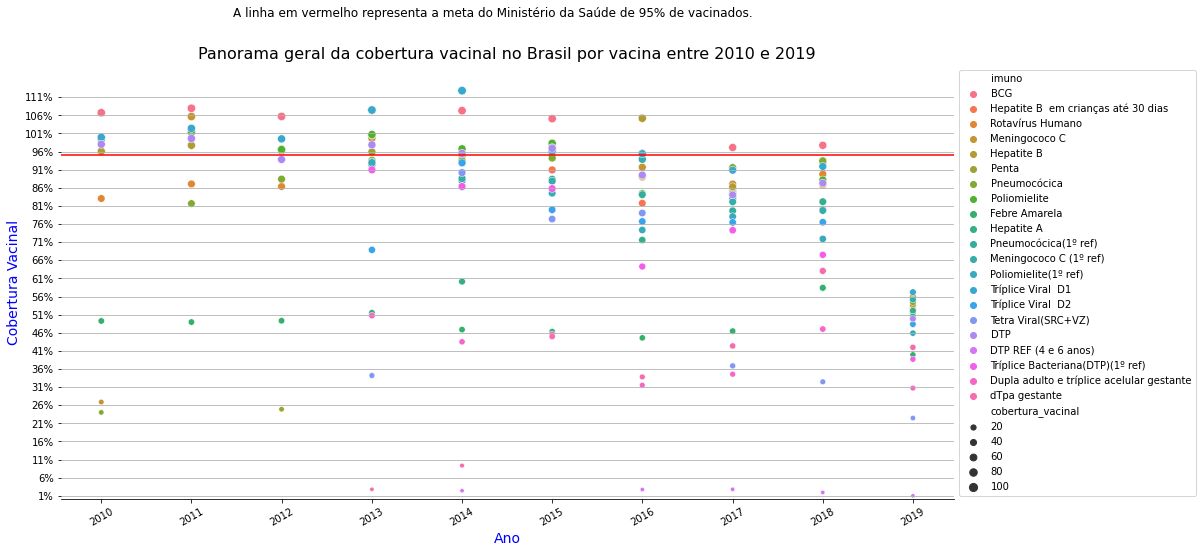

In [48]:
# Criando o gráfico
plt.figure(figsize=(16,8))
ax = sns.scatterplot(data=melted_cv_imuno_ano.query('imuno != "Poliomielite 4 anos" and cobertura_vacinal > 0.00'), x='ano', y='cobertura_vacinal', hue='imuno', size='cobertura_vacinal')
plt.xticks(rotation=30)

# Título do gráfico
plt.title("Panorama geral da cobertura vacinal no Brasil por vacina entre 2010 e 2019", fontsize=16)
plt.suptitle('A linha em vermelho representa a meta do Ministério da Saúde de 95% de vacinados.', fontsize=12)


sns.despine(left=True)
plt.grid(axis='y')

# Configurando as legendas
plt.legend(loc = 2, bbox_to_anchor = (1, 1))

# Configurando as labels
plt.xlabel("Ano", fontsize=14, color='b')
plt.ylabel("Cobertura Vacinal", fontsize=14, color='b')

# Criando a linha da meta do Ministério da Saúde
plt.axhline(y=95, ls='-', c='red')

# Configuração do eixo y
plt.ylim(0, 120)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,g}%'))

# Configuração do eixo x
# E o offset é o início dos ticks, offset=0 começaria do primeiro mês registrado no dataset, offset=11 seria os janeiros de cada ano.
ax.yaxis.set_major_locator(ticker.IndexLocator(base=5, offset=0))

plt.show()

De forma geral, já conseguimos ver que a maioria das vacinas não atingiram a meta do Ministério da Saúde de 95% de cobertual vacinal.

Vacinação por estado:

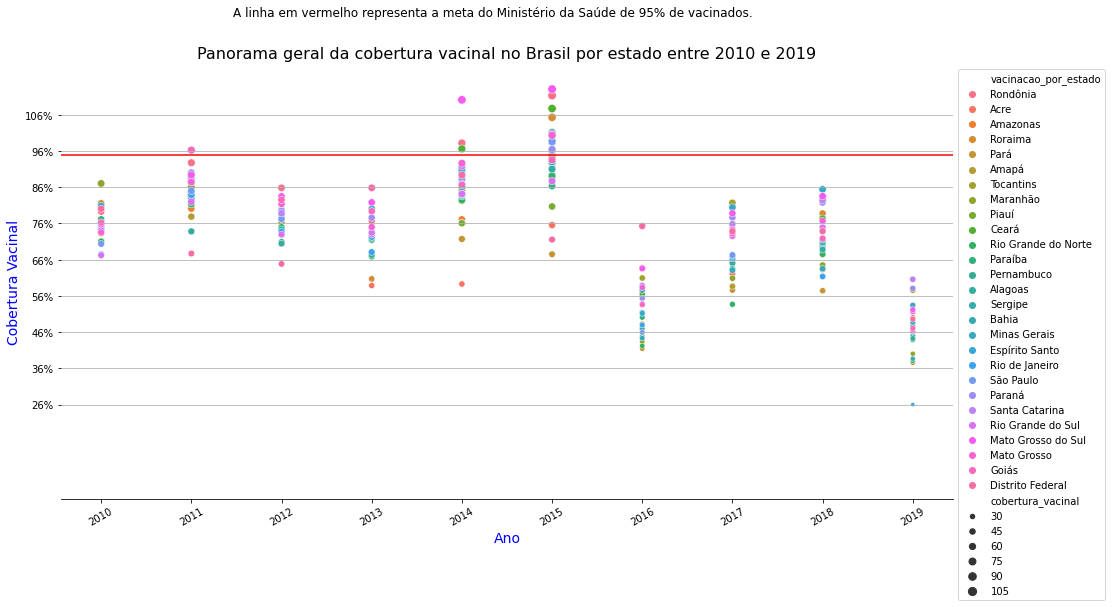

In [49]:
# Criando o gráfico
regiao = ['Região Norte', 'Região Nordeste', 'Região Sudeste', 'Região Sul', 'Região Centro-Oeste']
plt.figure(figsize=(16,8))
ax = sns.scatterplot(data=melted_cv_regiao_uf.query('vacinacao_por_estado not in @regiao'), x='ano', y='cobertura_vacinal', 
                     hue='vacinacao_por_estado', size='cobertura_vacinal')

# Título do gráfico
plt.title('Panorama geral da cobertura vacinal no Brasil por estado entre 2010 e 2019', fontsize=16)
plt.suptitle('A linha em vermelho representa a meta do Ministério da Saúde de 95% de vacinados.', fontsize=12)


# Configurando as labels
plt.xlabel("Ano", fontsize=14, color='b')
plt.ylabel("Cobertura Vacinal", fontsize=14, color='b')

# Configurando o eixo x
plt.xticks(rotation=30)

# Retirando as molduras do topo e da direita
sns.despine(left=True)
plt.grid(axis='y') # Colocando grades apenas no eixo y

# Configurando as legendas
plt.legend(loc = 2, bbox_to_anchor = (1, 1))

# Criando a linha da meta do Ministério da Saúde
plt.axhline(y=95, ls='-', c='red')

# Configuração do eixo y
plt.ylim(0, 120)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}%'))

# Configuração do eixo x
# E o offset é o início dos ticks, offset=0 começaria do primeiro mês registrado no dataset, offset=11 seria os janeiros de cada ano.
ax.yaxis.set_major_locator(ticker.IndexLocator(base=10, offset=0))

plt.show()


Por região:

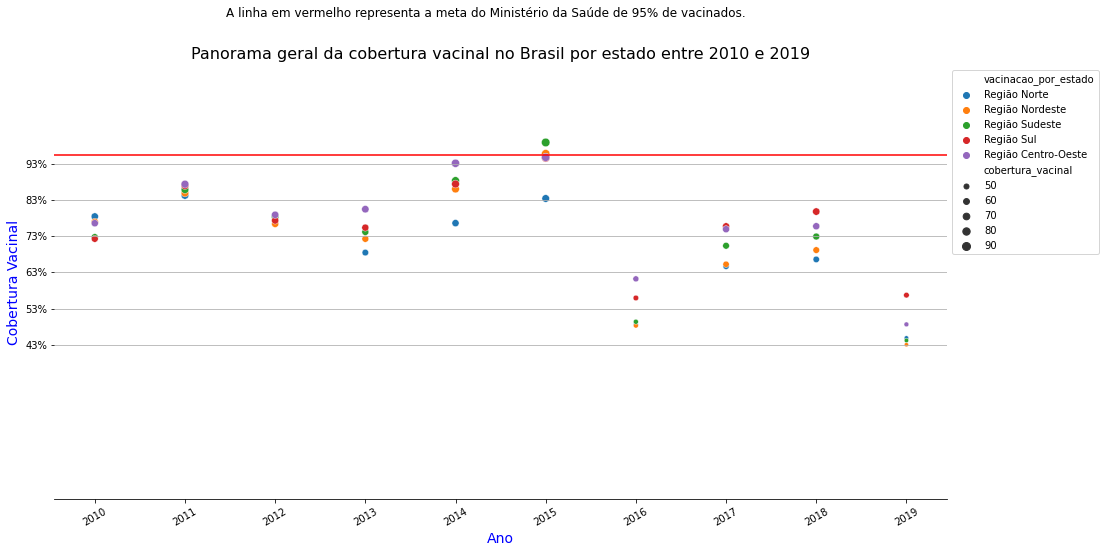

In [50]:
regiao = ['Região Norte', 'Região Nordeste', 'Região Sudeste', 'Região Sul', 'Região Centro-Oeste']

# Criando o gráfico
plt.figure(figsize=(16,8))
ax = sns.scatterplot(data=melted_cv_regiao_uf.query('vacinacao_por_estado in @regiao'), x='ano', y='cobertura_vacinal', 
                     hue='vacinacao_por_estado', size='cobertura_vacinal')
plt.xticks(rotation=30)

# Título do gráfico
plt.title('Panorama geral da cobertura vacinal no Brasil por estado entre 2010 e 2019', fontsize=16)
plt.suptitle('A linha em vermelho representa a meta do Ministério da Saúde de 95% de vacinados.', fontsize=12)


# Configurando as labels
plt.xlabel("Ano", fontsize=14, color='b')
plt.ylabel("Cobertura Vacinal", fontsize=14, color='b')

# Configurando o eixo x
plt.xticks(rotation=30)

# Retirando as molduras do topo e da direita
sns.despine(left=True)
plt.grid(axis='y') # Colocando grades apenas no eixo y

# Configurando as legendas
plt.legend(loc = 2, bbox_to_anchor = (1, 1))

# Criando a linha da meta do Ministério da Saúde
plt.axhline(y=95, ls='-', c='red')

# Configuração do eixo y
plt.ylim(0, 120)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}%'))

# Configuração do eixo x
# E o offset é o início dos ticks, offset=0 começaria do primeiro mês registrado no dataset, offset=11 seria os janeiros de cada ano.
ax.yaxis.set_major_locator(ticker.IndexLocator(base=10, offset=0))


plt.show()


**Análise:** Quando analisamos as regiões do Brasil separadamente, podemos notar que há uma clara dificuldade de atingir a meta do Ministério da Saúde. Claro que quando somamos todas as vacinas fica difícil saber quais delas estão puxando a média geral da vacinação para baixo, analisaremos as vacinas individualmente mais tarde, mas como a média geral da cobertura vacinal está muito abaixo da meta isto provavelmente significa que a maioria delas não atingiu o público alvo como esperado.

Também podemos notar uma clara tendência de queda na cobertura vacinal em todas as regiões de 2016 a 2019, abaixo da média anterior mais baixa até então (2015).

Outro ponto importante a salientar é que a região norte é a que menos atinge as metas do Ministério da Saúde em todos os anos analisados. Acredito que se deva à dificuldade de atingir as populações mais isoladas e que vivem em áreas de difícil acesso desta região, além de outros fatores como infra-estrutura precária dos postos de saúde, falta de profissionais e de recursos financeiros.

Por vacina:

**Vacina BCG** - protege contra meningite tuberculosa e a tuberculose miliar.

**Introdução no clendário nacional:** 1925

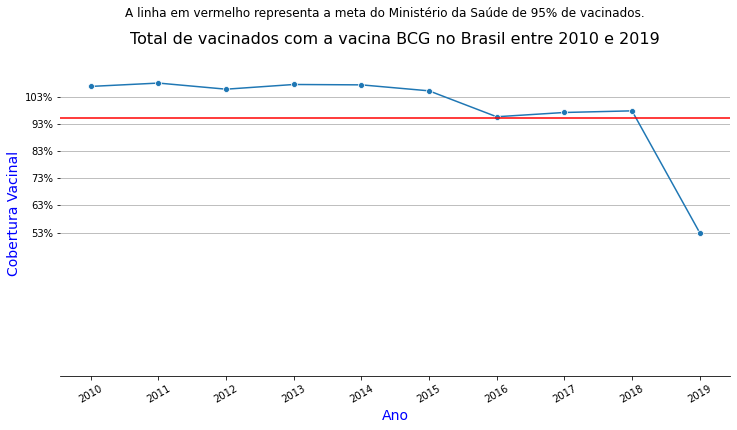

In [51]:
# hue='cobertura_vacinal', size='cobertura_vacinal'
# Criando o gráfico
plt.figure(figsize=(12,6))
ax = sns.lineplot(data=melted_cv_imuno_ano.query('imuno in "BCG"'), x='ano', y='cobertura_vacinal', marker='o')

# Título do gráfico
plt.title('Total de vacinados com a vacina BCG no Brasil entre 2010 e 2019', fontsize=16)
plt.suptitle('A linha em vermelho representa a meta do Ministério da Saúde de 95% de vacinados.', fontsize=12)

# Configurando as labels
plt.xlabel("Ano", fontsize=14, color='b')
plt.ylabel("Cobertura Vacinal", fontsize=14, color='b')

# Configurando o eixo x
plt.xticks(rotation=30)

# Retirando as molduras do topo e da direita
sns.despine(left=True)
plt.grid(axis='y') # Colocando grades apenas no eixo y

# Criando a linha da meta do Ministério da Saúde
plt.axhline(y=95, ls='-', c='red')

# Configuração do eixo y
plt.ylim(0, 120)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}%'))

# Configuração do eixo x
# E o offset é o início dos ticks, offset=0 começaria do primeiro mês registrado no dataset, offset=11 seria os janeiros de cada ano.
ax.yaxis.set_major_locator(ticker.IndexLocator(base=10, offset=0))

plt.show()

**Análise:**  No período de 9 anos podemos ver uma estabilidade na imunização das crianças, com uma estimativa de 100% das crianças vacinadas, mas em 2016 houve uma queda de 9% na cobertura vacinal em relação a 2015, com uma leve subida de 1,5% em 2017. Porém de 2018 a 2019, houve uma queda de 45%, quase a metade das crianças brasileiras não tomaram a vacina BCG, um dado muito alarmante em que poderemos ver a consequencias devastadoras em breve.

A variação percentual durante todo o período analisado foi de  -50.37%.

**Hepatite B** para público geral e a Hepatite B  em crianças até 30 dias - protege contra o vírus da Hepatite B.

**Hepatite A** - protege contra o vírus da Hepatite A.

**Introdução no calendário nacional:** 
 - Hepatite B - 1992 para algums grupos e 1998 para a população geral;
 - Hepatite A - 2014.

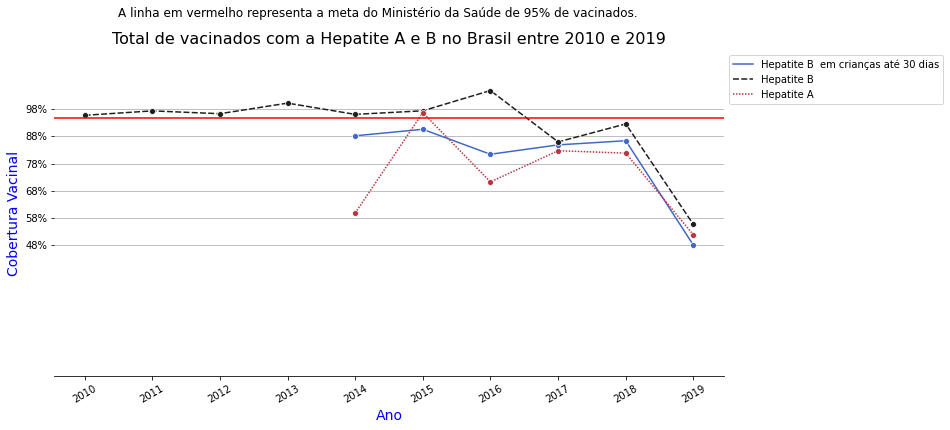

In [52]:
# Criando o gráfico
plt.figure(figsize=(12,6))
ax = sns.lineplot(data=melted_cv_imuno_ano.query('imuno in ("Hepatite B", "Hepatite B  em crianças até 30 dias", "Hepatite A") and cobertura_vacinal > 0.00'), x='ano', y='cobertura_vacinal', 
                     hue='imuno', style='imuno', marker='o', palette='icefire')

# Título do gráfico
plt.title('Total de vacinados com a Hepatite A e B no Brasil entre 2010 e 2019', fontsize=16)
plt.suptitle('A linha em vermelho representa a meta do Ministério da Saúde de 95% de vacinados.', fontsize=12)

# Configurando as labels
plt.xlabel("Ano", fontsize=14, color='b')
plt.ylabel("Cobertura Vacinal", fontsize=14, color='b')

# Configurando o eixo x
plt.xticks(rotation=30)

# Retirando as molduras do topo e da direita
sns.despine(left=True)
plt.grid(axis='y') # Colocando grades apenas no eixo y

# Configurando as legendas
plt.legend(loc = 2, bbox_to_anchor = (1, 1))

# Criando a linha da meta do Ministério da Saúde
plt.axhline(y=95, ls='-', c='red')

# Configuração do eixo y
plt.ylim(0, 120)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}%'))

# Configuração do eixo x
# E o offset é o início dos ticks, offset=0 começaria do primeiro mês registrado no dataset, offset=11 seria os janeiros de cada ano.
ax.yaxis.set_major_locator(ticker.IndexLocator(base=10, offset=0))

plt.show()


**Análise:** A vacina da Hepatite B para o público geral, foi um sucesso de adesão da população por muito tempo, sempre atingindo as metas do Ministério da Saúde, porém em 2017 teve uma queda de 17% em relação a 2016, seguida de uma leve subida de 7% em 2018. Porém uma nova queda se sucedeu em 2019, de 39%, um percentual bem significativo que nos faz ficar aleretas, será necessário dados mais atualizados que incluam os anos de 2020 e 2021 para confirmar se há uma verdadeira tendência de queda na cobertura vacinal. A variação percentual em todo o período analisado foi de -39%.

Entre as vacinas da Hepatite A e B destinadas ao público infantil, apenas a Hepatite A atingiu a meta de 95% de crianças vacinadas e isto foi no ano de 2015, a queda percentual entre o ano de 2018 e 2019 foi de 36% para Hepatite A e de 44% para a Hepatite B. A variação percentual entre os anos analizados foi de -13% (Hepatite A) e -45% (Hepatite B).

**Rotavírus humano** - protege contra gastroenterite causada por rotavírus.

**Introdução no calendário nacional:** 2006.

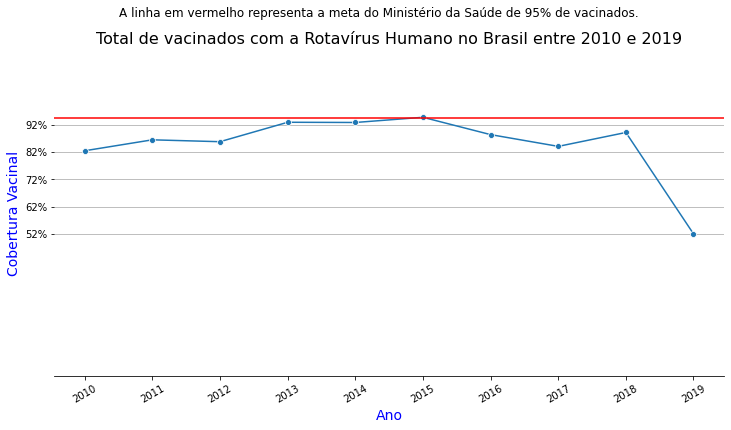

In [53]:
# Criando o gráfico
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=melted_cv_imuno_ano.query('imuno in "Rotavírus Humano"'), x='ano', y='cobertura_vacinal', marker='o')

# Título do gráfico
plt.title("Total de vacinados com a Rotavírus Humano no Brasil entre 2010 e 2019", fontsize=16)
plt.suptitle('A linha em vermelho representa a meta do Ministério da Saúde de 95% de vacinados.', fontsize=12)

# Configurando as labels
plt.xlabel("Ano", fontsize=14, color='b')
plt.ylabel("Cobertura Vacinal", fontsize=14, color='b')

# Configurando o eixo x
plt.xticks(rotation=30)

# Retirando as molduras do topo e da direita
sns.despine(left=True)
plt.grid(axis='y') # Colocando grades apenas no eixo y

# Criando a linha da meta do Ministério da Saúde
plt.axhline(y=95, ls='-', c='red')

# Configuração do eixo y
plt.ylim(0, 120)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}%'))

# Configuração do eixo x
# E o offset é o início dos ticks, offset=0 começaria do primeiro mês registrado no dataset, offset=11 seria os janeiros de cada ano.
ax.yaxis.set_major_locator(ticker.IndexLocator(base=10, offset=0))

plt.show()

**Análise:** Apesar de haver uma tendência de subida das taxas vacinais entre 2010 a 2015, a meta de vacinar 95% das crianças só foi atingida em 2015. Desde então uma tendência de queda se seguiu apesar de haver um leve crescimento em 2018 (6%), em 2019 a queda percentual foi de 41%, muito significativa para ser ignorada. É necessário analisar os dados de anos mais recentes para confirmar a se há tendência de queda. A variação percentual total dos anos analisados foi de -36%.

**Meningococo C** - protege contra o tipo C da doença meningocócica.

**Introdução no calendário nacional:** 1974 para subgrupos especiais e no controle de surtos da doença. E em 2010 entrou no calendário de vacinação nacional para as crianças menores de 2 anos. Em 2017 foi incluída para adolescentes entre 11 e 14 anos.

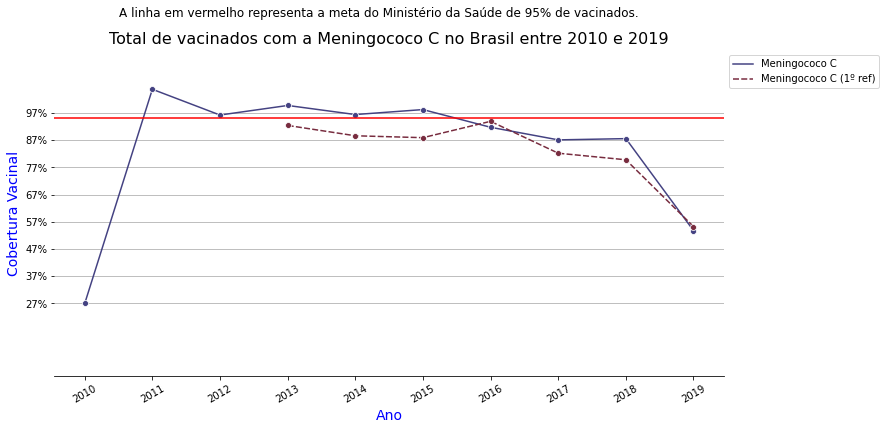

In [54]:
# Criando o gráfico
plt.figure(figsize=(12,6))
ax = sns.lineplot(data=melted_cv_imuno_ano.query('imuno in ("Meningococo C", "Meningococo C (1º ref)") and cobertura_vacinal > 0.00'), x='ano', y='cobertura_vacinal',
                  hue='imuno', style='imuno', marker='o', palette='icefire')

# Título do gráfico
plt.title("Total de vacinados com a Meningococo C no Brasil entre 2010 e 2019", fontsize=16)
plt.suptitle('A linha em vermelho representa a meta do Ministério da Saúde de 95% de vacinados.', fontsize=12)

# Configurando as labels
plt.xlabel("Ano", fontsize=14, color='b')
plt.ylabel("Cobertura Vacinal", fontsize=14, color='b')

# Configurando o eixo x
plt.xticks(rotation=30)

# Retirando as molduras do topo e da direita
sns.despine(left=True)
plt.grid(axis='y') # Colocando grades apenas no eixo y

# Configurando as legendas
plt.legend(loc = 2, bbox_to_anchor = (1, 1))

# Criando a linha da meta do Ministério da Saúde
plt.axhline(y=95, ls='-', c='red')

# Configuração do eixo y
plt.ylim(0, 120)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}%'))

# Configuração do eixo x
# E o offset é o início dos ticks, offset=0 começaria do primeiro mês registrado no dataset, offset=11 seria os janeiros de cada ano.
ax.yaxis.set_major_locator(ticker.IndexLocator(base=10, offset=0))

plt.show()

**Análise:** Desde sua introdução no calendário nacional em 2010 a vacina atingiu a meta estabelecida pelo Ministério da Saúde, porém desde 2015 que há uma tendência de queda na cobertura vacinal, entre 2018 e 2019 foi de -38%. A variação percentual total dos anos analisados foi de 99%.

Já a dose de reforço, a meta ministerial nunca foi atingida e a queda percentual entre 2018 e 2019 foi de 30%, mas antes mesmo disso fica evidente a curva descendente da cobertura vacinal, indicando uma clara tendência de queda.

**Pentavalente** é uma combinação de vacinas que previne 5 doenças: tétano, hepatite B, coqueluche, difteria e meningite causada pela Haemophilus influenza tipo B.

**Introdução no calendário nacional:** 2012.

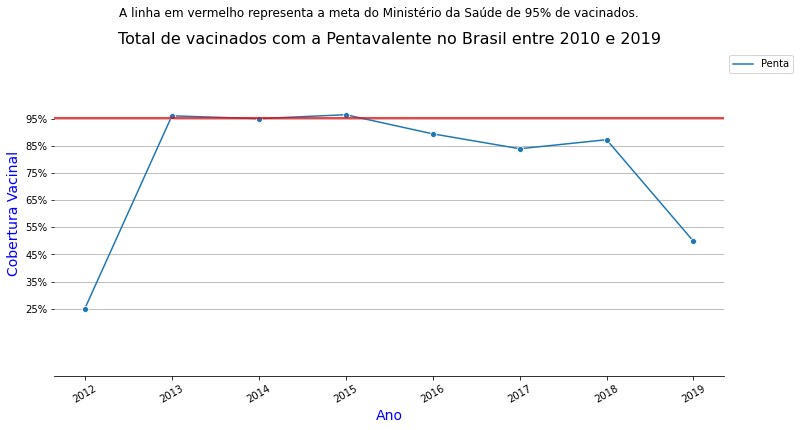

In [55]:
# Criando o gráfico
plt.figure(figsize=(12,6))
ax = sns.lineplot(data=melted_cv_imuno_ano.query('imuno in "Penta" and cobertura_vacinal > 0.00'), x='ano', y='cobertura_vacinal',
                     hue='imuno', style='imuno', marker='o')
plt.xticks(rotation=30)

# Título do gráficio
plt.title("Total de vacinados com a Pentavalente no Brasil entre 2010 e 2019", fontsize=16)
plt.suptitle('A linha em vermelho representa a meta do Ministério da Saúde de 95% de vacinados.', fontsize=12)

# Configurando as labels
plt.xlabel("Ano", fontsize=14, color='b')
plt.ylabel("Cobertura Vacinal", fontsize=14, color='b')

# Configurando o eixo x
plt.xticks(rotation=30)

# Retirando as molduras do topo e da direita
sns.despine(left=True)
plt.grid(axis='y') # Colocando grades apenas no eixo y

# Configurando as legendas
plt.legend(loc = 2, bbox_to_anchor = (1, 1))

# Criando a linha da meta do Ministério da Saúde
plt.axhline(y=95, ls='-', c='red')

# Configuração do eixo y
plt.ylim(0, 120)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}%'))

# Configuração do eixo x
# E o offset é o início dos ticks, offset=0 começaria do primeiro mês registrado no dataset, offset=11 seria os janeiros de cada ano.
ax.yaxis.set_major_locator(ticker.IndexLocator(base=10, offset=0))


plt.show()

**Análise:** Esta vacina atingiu a meta de 95% de vacinados apenas em 2013, 2014 e 2015. Após 2015 tem ocorrido uma clara tendência de queda na cobertura vacinal.

**Pneumocócica** - protege contra doenças causadas pela bactéria pneumococo, como pneumonias, meningites e outras.

**Introdução no calendário nacional de vacinação:** 2010.

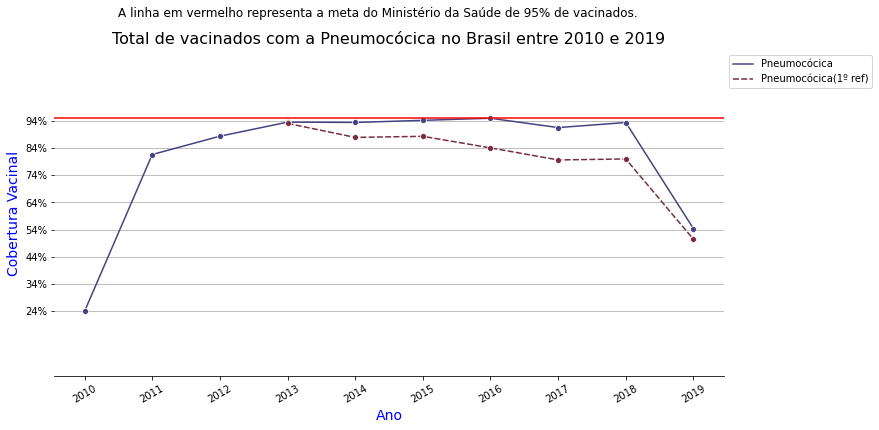

In [56]:
# Criando o gráfico
plt.figure(figsize=(12,6))
ax = sns.lineplot(data=melted_cv_imuno_ano.query('imuno in ("Pneumocócica", "Pneumocócica(1º ref)") and cobertura_vacinal > 0.00'), x='ano', y='cobertura_vacinal', 
                     hue='imuno', style='imuno',marker='o', palette='icefire')

# Título do gráfico
plt.title("Total de vacinados com a Pneumocócica no Brasil entre 2010 e 2019", fontsize=16)
plt.suptitle('A linha em vermelho representa a meta do Ministério da Saúde de 95% de vacinados.', fontsize=12)

# Configurando as labels
plt.xlabel("Ano", fontsize=14, color='b')
plt.ylabel("Cobertura Vacinal", fontsize=14, color='b')

# Configurando o eixo x
plt.xticks(rotation=30)

# Retirando as molduras do topo e da direita
sns.despine(left=True)
plt.grid(axis='y') # Colocando grades apenas no eixo y

# Configurando as legendas
plt.legend(loc = 2, bbox_to_anchor = (1, 1))

# Criando a linha da meta do Ministério da Saúde
plt.axhline(y=95, ls='-', c='red')

# Configuração do eixo y
plt.ylim(0, 120)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}%'))

# Configuração do eixo x
# E o offset é o início dos ticks, offset=0 começaria do primeiro mês registrado no dataset, offset=11 seria os janeiros de cada ano.
ax.yaxis.set_major_locator(ticker.IndexLocator(base=10, offset=0))

plt.show()

**Análise:** Esta vacina atingiu a meta do Ministério da Saúde de vacinados apenas em 2016, se considerarmos as margens de erro no calculo das taxas de cobertura vacinal podemos também incluir os anos de 2013 a 2015. Após 2015 tem ocorrido uma clara tendência de queda na cobertura vacinal. A dose de reforço nunca atingiu a meta de 95%.

**Poliomielite** - protege contra a poliomielite, uma infecção viral muito contagiosa que afeta a medula espinhal e o cérebro.

**Introdução no calendário nacional de vacinação:** Primeira campanha nacional ocorreu em 1961. 1980 foi introduzido no calendário nacional de vacinação às crianças.

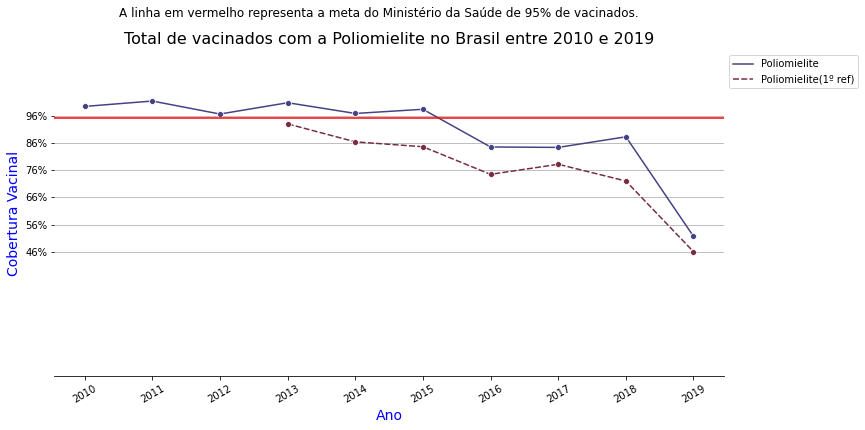

In [57]:
# criando o gráfico
plt.figure(figsize=(12,6))
ax = sns.lineplot(data=melted_cv_imuno_ano.query('imuno in ("Poliomielite", "Poliomielite(1º ref)") and cobertura_vacinal > 0.00'), x='ano', y='cobertura_vacinal', 
                     hue='imuno', style='imuno', marker='o', palette='icefire')

# Título do gráfico
plt.title("Total de vacinados com a Poliomielite no Brasil entre 2010 e 2019", fontsize=16)
plt.suptitle('A linha em vermelho representa a meta do Ministério da Saúde de 95% de vacinados.', fontsize=12)

# Configurando as labels
plt.xlabel("Ano", fontsize=14, color='b')
plt.ylabel("Cobertura Vacinal", fontsize=14, color='b')

# Configurando o eixo x
plt.xticks(rotation=30)

# Retirando as molduras do topo e da direita
sns.despine(left=True)
plt.grid(axis='y') # Colocando grades apenas no eixo y

# Configurando as legendas
plt.legend(loc = 2, bbox_to_anchor = (1, 1))

# Criando a linha da meta do Ministério da Saúde
plt.axhline(y=95, ls='-', c='red')

# Configuração do eixo y
plt.ylim(0, 120)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}%'))

# Configuração do eixo x
# E o offset é o início dos ticks, offset=0 começaria do primeiro mês registrado no dataset, offset=11 seria os janeiros de cada ano.
ax.yaxis.set_major_locator(ticker.IndexLocator(base=10, offset=0))

plt.show()

**Análise:** De 2010 a 2015 as metas foram atingidas, mas desde então uma clara curva descendente na cobertura vacinal é notada. Para a dose de reforço a meta nunca foi atingida nos anos analisados. Entre 2018 e 2019 a queda percentual foi de 41% para a vacina de poliomielite e de -36% para o reforço. A variação percentual total entre os anos de 2010 e 2019 foi de -48% e -50% para poliomielite e seu reforço respectivamente.

**Febre Amarela** - proteger contra a febre amarela, uma doença causada por mosquitos infectados com o vírus da febre amarela.

**1999** - Incorporação da atual vacina contra febre amarela nos territórios considerados de risco. Em **2020** o Ministério da Saúde inclui a vacina de forma rotineira para todo o Brasil.

No handles with labels found to put in legend.


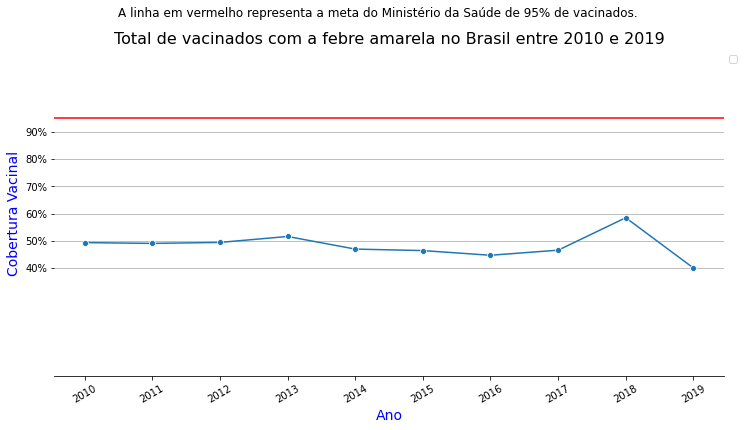

In [58]:
# Criando o gráfico
plt.figure(figsize=(12,6))
ax = sns.lineplot(data=melted_cv_imuno_ano.query('imuno in ("Febre Amarela")'), x='ano', y='cobertura_vacinal', marker='o')

# Título do gráfico
plt.title("Total de vacinados com a febre amarela no Brasil entre 2010 e 2019", fontsize=16)
plt.suptitle('A linha em vermelho representa a meta do Ministério da Saúde de 95% de vacinados.', fontsize=12)

# Configurando as labels
plt.xlabel("Ano", fontsize=14, color='b')
plt.ylabel("Cobertura Vacinal", fontsize=14, color='b')

# Configurando o eixo x
plt.xticks(rotation=30)

# Retirando as molduras do topo e da direita
sns.despine(left=True)
plt.grid(axis='y') # Colocando grades apenas no eixo y

# Configurando as legendas
plt.legend(loc = 2, bbox_to_anchor = (1, 1))

# Criando a linha da meta do Ministério da Saúde
plt.axhline(y=95, ls='-', c='red')

# Configuração do eixo y
plt.ylim(0, 120)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}%'))

# Configuração do eixo x
# E o offset é o início dos ticks, offset=0 começaria do primeiro mês registrado no dataset, offset=11 seria os janeiros de cada ano.
ax.yaxis.set_major_locator(ticker.IndexLocator(base=10, offset=0))

plt.show()

A vacina da febre amarela só fazia parte da rotina do calendário vacinal em 19 estados. Fora destes estados só era recomendado se fosse viajar para o exterior e regiões afetadas pela doença. Desde 2020 a vacina está sendo introduzida em todos os estados do Brasil de forma rotineira, podendo ser tomada por crianças e adultos até 59 anos, o reforço é indicado apenas em crianças até 4 anos. 

Por este motivo, a vacinação tem que ser analisada de forma especial, podemos ver uma maior procura pela vacina em anos de surtos da doença. O último grande surto da doença no país foi em 2017 e 2018, exatamente nos anos em que houve um aumento nas taxas de cobertura vacinal. 

Como a vacina da febre amarela vai se tornar disponível em todo o território nacional de forma rotineira apenas em 2020, só fará sentido analisar a adesão à vacina após a adaptação de todos os estados à nova recomendação do Ministério da saúde.

**Tríplice Viral  D1 e Tríplice Viral  D2** - proteger contra os vírus do sarampo, caxumba e rubéola.

**Introdução no calendário nacional:** 1995.

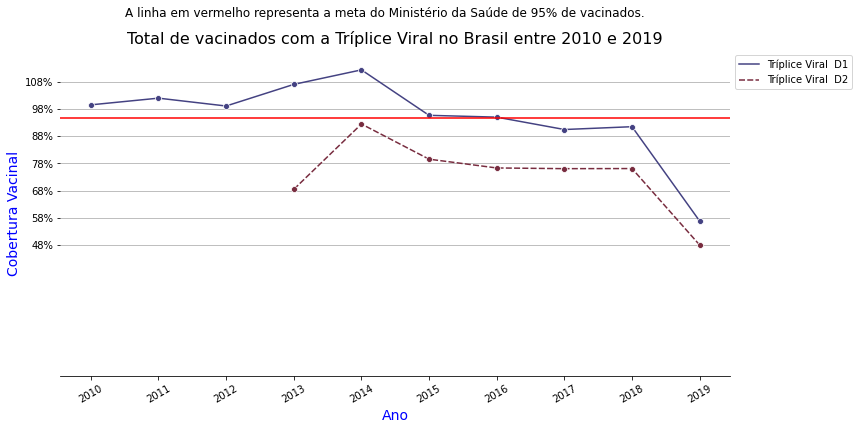

In [59]:
# Criando o gráfico
plt.figure(figsize=(12,6))
ax = sns.lineplot(data=melted_cv_imuno_ano.query('imuno in ("Tríplice Viral  D1", "Tríplice Viral  D2") and cobertura_vacinal > 0.00'), x='ano', y='cobertura_vacinal', 
                     hue='imuno', style='imuno', marker='o', palette='icefire')

# Título do gráfico
plt.title("Total de vacinados com a Tríplice Viral no Brasil entre 2010 e 2019", fontsize=16)
plt.suptitle('A linha em vermelho representa a meta do Ministério da Saúde de 95% de vacinados.', fontsize=12)

# Configurando as labels
plt.xlabel("Ano", fontsize=14, color='b')
plt.ylabel("Cobertura Vacinal", fontsize=14, color='b')

# Configurando o eixo x
plt.xticks(rotation=30)

# Retirando as molduras do topo e da direita
sns.despine(left=True)
plt.grid(axis='y') # Colocando grades apenas no eixo y

# Configurando as legendas
plt.legend(loc = 2, bbox_to_anchor = (1, 1))

# Criando a linha da meta do Ministério da Saúde
plt.axhline(y=95, ls='-', c='red')

# Configuração do eixo y
plt.ylim(0, 120)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}%'))

# Configuração do eixo x
# E o offset é o início dos ticks, offset=0 começaria do primeiro mês registrado no dataset, offset=11 seria os janeiros de cada ano.
ax.yaxis.set_major_locator(ticker.IndexLocator(base=10, offset=0))

plt.show()

**Análise:** Assim como as outras vacinas, a tríplice viral está com as taxas de cobertura vacinal em queda, mesmo que anteriormente tenha atingido a meta de 95% de crianças vacinadas por anos seguidos. Enquanto que a D2 nunca atingiu a meta do Ministério da Saúde.

A queda na cobertura vacinal entre 2018 e 2019 foi de 37% e 36% para Tríplice Viral D1 e D2 respectivamente. Enquanto que a variação total durante o período de 2010 a 2019 foi de -42% para a tríplice viral D1 e de -29%  para a D2.

**Tetra Viral(SRC+VZ)** - previne contra sarampo, rubéola, caxumba e varicela (catapora).

**Introdução no calendário nacional:** 2013.

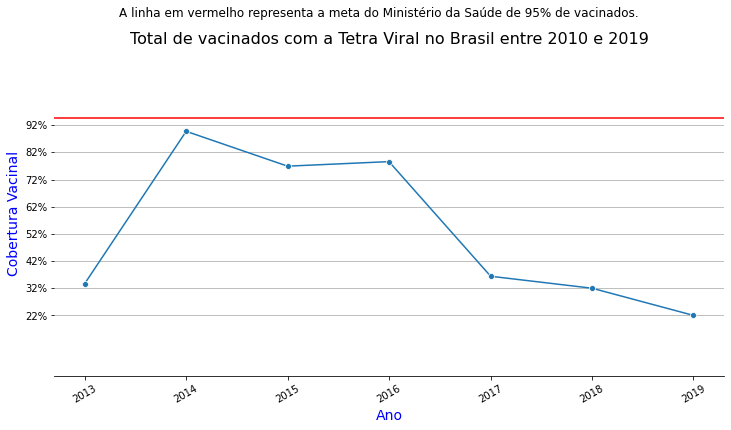

In [60]:
# Criando o gráfico
plt.figure(figsize=(12,6))
ax = sns.lineplot(data=melted_cv_imuno_ano.query('imuno in ("Tetra Viral(SRC+VZ)") and cobertura_vacinal > 0.00'), x='ano', y='cobertura_vacinal', marker='o')

# Título do gráfico
plt.title("Total de vacinados com a Tetra Viral no Brasil entre 2010 e 2019", fontsize=16)
plt.suptitle('A linha em vermelho representa a meta do Ministério da Saúde de 95% de vacinados.', fontsize=12)

# Configurando as labels
plt.xlabel("Ano", fontsize=14, color='b')
plt.ylabel("Cobertura Vacinal", fontsize=14, color='b')

# Configurando o eixo x
plt.xticks(rotation=30)

# Retirando as molduras do topo e da direita
sns.despine(left=True)
plt.grid(axis='y') # Colocando grades apenas no eixo y

# Criando a linha da meta do Ministério da Saúde
plt.axhline(y=95, ls='-', c='red')

# Configuração do eixo y
plt.ylim(0, 120)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}%'))

# Configuração do eixo x
# E o offset é o início dos ticks, offset=0 começaria do primeiro mês registrado no dataset, offset=11 seria os janeiros de cada ano.
ax.yaxis.set_major_locator(ticker.IndexLocator(base=10, offset=0))

plt.show()

**Análise:** No ano em que a vacina entrou para o calendário nacional a cobertura vacinal ficou bem abaixo da meta, mas logo no ano seguinte teve um aumento de 163%. Também é possível ver uma curva decrescente na cobertura vacinal, porém em nenhum ano a vacina atingiu a meta do Ministério da Saúde. A variação percentual total dos anos analisados foi de -34%.

 **DTP** - previne a difteria, tétano e coqueluche.
 
 **Introdução no calendário nacional:** 
 **1998** - dupla bacteriana (dT), contendo também o toxoide diftérico.

 **2013** - dTpa (tétano, difteria e coqueluche acelular) para gestantes.

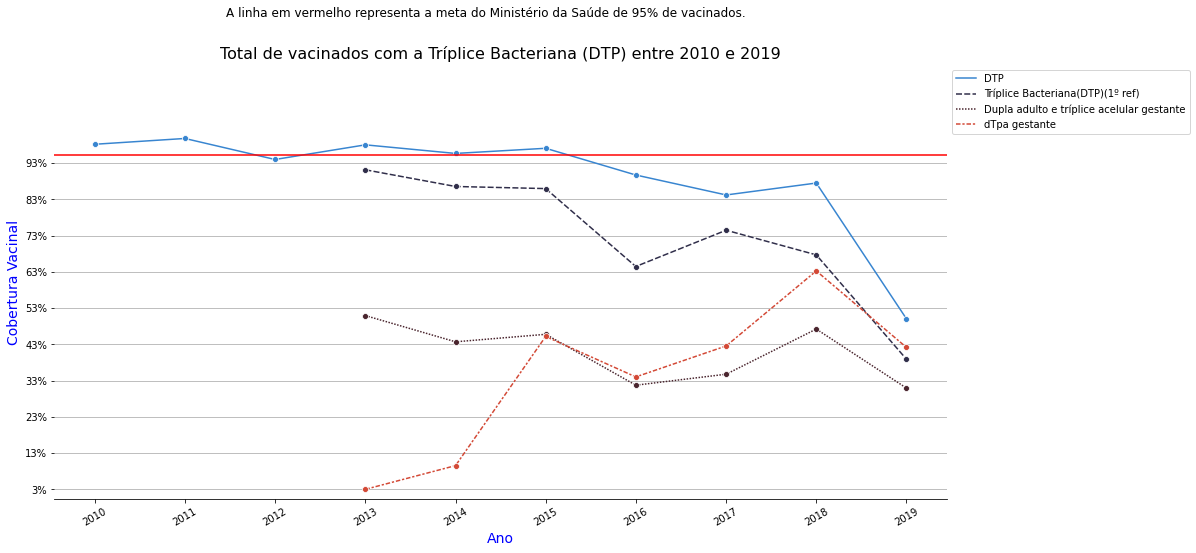

In [61]:
# Preparando os dados
dtp = melted_cv_imuno_ano.query('imuno in ("DTP", "Tríplice Bacteriana(DTP)(1º ref)","Dupla adulto e tríplice acelular gestante", "dTpa gestante") and cobertura_vacinal > 0.00')

# Criando o gráfico
plt.figure(figsize=(16,8))
ax = sns.lineplot(data=dtp, x='ano', y='cobertura_vacinal', hue='imuno', style='imuno', marker='o', palette='icefire')

# Título do gráfico
plt.title("Total de vacinados com a Tríplice Bacteriana (DTP) entre 2010 e 2019", fontsize=16)
plt.suptitle('A linha em vermelho representa a meta do Ministério da Saúde de 95% de vacinados.', fontsize=12)

# Configurando as labels
plt.xlabel("Ano", fontsize=14, color='b')
plt.ylabel("Cobertura Vacinal", fontsize=14, color='b')

# Configurando o eixo x
plt.xticks(rotation=30)

# Retirando as molduras do topo e da direita
sns.despine(left=True)
plt.grid(axis='y') # Colocando grades apenas no eixo y

# Configurando as legendas
plt.legend(loc = 2, bbox_to_anchor = (1, 1))

# Criando a linha da meta do Ministério da Saúde
plt.axhline(y=95, ls='-', c='red')

# Configuração do eixo y
plt.ylim(0, 120)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}%'))

# Configuração do eixo x
# E o offset é o início dos ticks, offset=0 começaria do primeiro mês registrado no dataset, offset=11 seria os janeiros de cada ano.
ax.yaxis.set_major_locator(ticker.IndexLocator(base=10, offset=0))

plt.show()

**Análise:** Como podemos observar no gráfico, apenas nos anos de 2010, 2011, 2013 e 2015 a meta de vacinar 95% das crianças foi atingida, porém a 1º dose de reforço nunca chegou a atingir a meta em nenhum dos anos analisados. A situação fica mais séria com relação às vacinas destinadas às mulheres grávidas, embora isso possa ser o resultado de um erro de estimativa de mulheres grávidas pelos municípios, ou seja, a estimativa superou o número real de gestantes naquele ano no município.

As vacinas DTP e DTPa para gestantes só foi introduzido no calendário nacional em 2014, por isso há um deficit de informação anterior a este ano.

**Conclusão:** É possível notar uma tendência clara de queda na cobertura vacinal de todas as vacinas disponíveis no SUS. As razões para isto vão desde comportamental da população (movimento anti-vacina), infraestrutura dos centros de saúde, até problemas com o abastecimento de vacinas essenciais e municípios com menos dinheiro para gerir os programas de imunização também são apontados como fatores importantes para a queda. Em 2005, 11 dos 26 estados superaram 90% de cobertura vacinal, em 2015 foram apenas 5 estados que ficaram acima desta marca.

Desde 2015, o país registra o desabastecimento de diversas vacinas. Do início de 2016 até junho de 2017, houve acesso limitado à vacina pentavalente acelular, também houve dificuldades com a BCG, que protege contra a tuberculose e é a primeira vacina dada ao recém-nascido. Apesar das verbas para campanhas de vacinação terem aumentado com o tempo a cada ano, pelo menos até o ano de 2018, quando o ciclo de aumento parou e houve uma redução de 21% dos valores gastos em 2019 comparados com 2018. As despesas caíram de R$  77 milhões para R$  60 milhões.

José Cassio de Moraes, professor do Departamento de Medicina Social da Faculdade de Ciências Médicas da Santa Casa de São Paulo, publicou em 2007 um estudo comparando as taxas de cobertura entre as diferentes classes sociais no Brasil, diz que as razões para as famílias não vacinarem seus filhos mude dependendo da classe econômica. Ele diz o seguinte: "Pessoas de estratos econômicos mais elevados, alimentadas por informações não científicas, acabam selecionando quais vacinas querem tomar e alguns até abdicam de tomar todas. Por outro lado, você tem dificuldade nos grupos mais pobres, uma dificuldade de acesso aos serviços de saúde". Moraes também defende um estudo profundo pelo Ministério da Saúde para compreender a queda nos índices de imunização e evitar que o país retroceda nesse quesito e enfrente consequências graves. Alertou Moraes em 2017. 

Porém as consequências já chegaram, o Brasil já enfrenta surtos de sarampo, meningite e febre amarela. "Em 2019, foram confirmados 7.972 casos de sarampo, destes 6.498 (81,4%) foram confirmados por critério laboratorial e 1.483 (18,6%) por critério clínico epidemiológico. O aumento de notificações ocorreu a partir da Semana Epidemiológica (SE) 24 até a SE 32 quando foi observado o pico dos registros". [Fonte](http://www.cosemssp.org.br/wp-content/uploads/2019/10/Boletim_epidemiologico_SVS_30.pdf).

A Europa também enfrentou consequências pela queda das taxas de vacinação. Apesar do continente possuir IDH alto e economia prospera, um surto de sarampo já infectou 14 mil pessoas em 2017, e a doença é considerada endêmica em 14 países da região, incluindo Alemanha, França e Romênia. Só nesse último, foram 31 mortes desde 2016.

O Brasil precisa voltar a investir largamente em campanhas de vacinação e educação sobre a importância da vacinação no combate e prevenção de doenças graves, combatendo as Fake News sobre a insegurança das vacinas aprovadas e utilizadas no calendário nacional de vacinação. Lembrando sempre que o melhor remédio é a prevenção. Se a epidemia da COVID-19 pode nos ensinar algo, é isto que ela está nos alertando hoje.

Fontes:

http://tabnet.datasus.gov.br/cgi/pni/notatecnicaCobertura.pdf

https://antigo.saude.gov.br/images/pdf/2017/agosto/17/AACOBERTURAS-VACINAIS-NO-BRASIL---2010-2014.pdf

https://www.conass.org.br/vacina-de-febre-amarela-fara-parte-da-rotina/

http://www.ccms.saude.gov.br/revolta/ltempo.html

https://radis.ensp.fiocruz.br/index.php/home/reportagem/linha-do-tempo-vacinacao-no-brasil

http://www.cosemssp.org.br/wp-content/uploads/2019/10/Boletim_epidemiologico_SVS_30.pdf